In [1]:
import ssl

import orbit
from   orbit.diagnostics.plot import plot_predicted_data
from   orbit.models.ets import ETSAggregated, ETSFull, ETSMAP
from   orbit.utils.dataset import load_iclaims

orbit.__version__

'1.0.13'

In [2]:
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
df = load_iclaims()
df

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


,week,claims,trend.unemploy,trend.filling,trend.job,sp500,vix
0,2010-01-03,13.386595,0.219882,-0.318452,0.117500,-0.417633,0.122654
1,2010-01-10,13.624218,0.219882,-0.194838,0.168794,-0.425480,0.110445
2,2010-01-17,13.398741,0.236143,-0.292477,0.117500,-0.465229,0.532339
3,2010-01-24,13.137549,0.203353,-0.194838,0.106918,-0.481751,0.428645
4,2010-01-31,13.196760,0.134360,-0.242466,0.074483,-0.488929,0.487404
...,...,...,...,...,...,...,...
438,2018-05-27,12.220202,0.116342,-0.004795,0.052260,0.452972,-0.175192
439,2018-06-03,12.162763,0.134360,0.014254,0.052260,0.469082,-0.275119
440,2018-06-10,12.288984,0.134360,0.104405,0.063433,0.469308,-0.291676
441,2018-06-17,12.235743,0.097992,0.104405,0.029532,0.460354,-0.152422


In [4]:
test_size = 52
train_df = df[:-test_size]
test_df = df[-test_size:]
y = 'claims'
date_col = 'week'

### MAP (Max a Posteriori)

In [5]:
ets = ETSMAP(response_col=y,
             date_col=date_col,
             seasonality=52,
             seed=1234)
ets.fit(df=train_df)
pred_df = ets.predict(df=test_df)

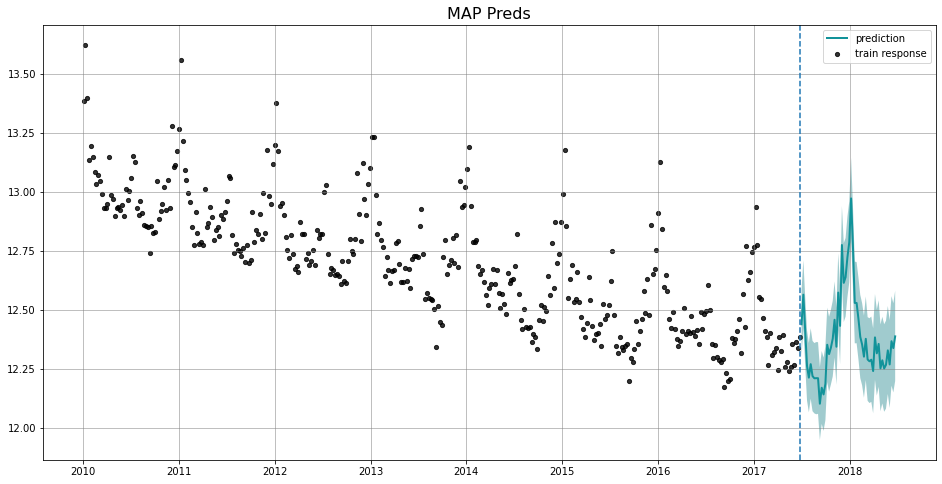

In [6]:
plot_predicted_data(train_df, pred_df, date_col, y, title='MAP Preds');

### Full Bayesian Estimation

In [11]:
%%time
ets = ETSFull(response_col=y,
              date_col=date_col,
              seasonality=52,
              seed=708,
              num_warmup=400,
              num_sample=400)
ets.fit(df=test_df)
pred_df = ets.predict(df=test_df)

KeyboardInterrupt: 

In [14]:
#plot_predicted_data(train_df, pred_df, date_col, y, title='Full');

In [13]:
#ets._posterior_samples.keys()

dict_keys([])